Connected to Python 3.10.12

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
import cv2 as cv


In [12]:
train = pd.read_csv('datasets/fashion-mnist_train.csv')
test = pd.read_csv('datasets/fashion-mnist_test.csv')

In [13]:
# Copy the features and target columns to different arrays: 
y_train= train['label']
# Drop the label feature
x_train = train.drop("label",axis=1)

x_train_np = np.float32(x_train.to_numpy())
y_train_np = np.float32(y_train.to_numpy())

In [14]:
model = cv.ml.KNearest_create()
model.train(x_train_np,cv.ml.ROW_SAMPLE, y_train_np)

True

In [15]:
# Copy the features and target columns to different arrays: 
y_test= test['label']
# Drop the label feature
x_test = test.drop("label",axis=1)

x_test_np = np.float32(x_test.to_numpy())
y_test_np = np.float32(y_test.to_numpy())

In [16]:
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


[[2.]]
Точность классификации: 100000.0


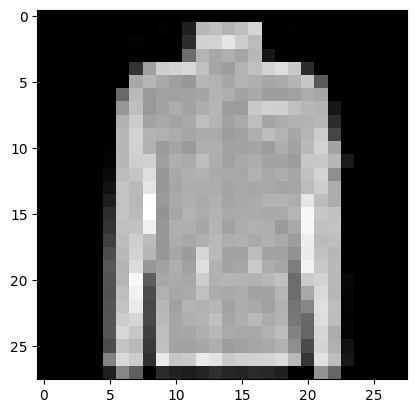

In [17]:
numberOfSample = 1100
sample = x_test_np[numberOfSample:numberOfSample + 1, :]
retVal, result, neighbors, dist = model.findNearest(sample, 5)
plt.imshow(sample.reshape(28, 28), 'gray')

matches = np.equal(result, y_test_np)
print(result)

# посчитаем количество правильных ответов
matches = matches.astype(np.int64)
correct = np.count_nonzero(matches)

# посчитаем точность классификации
accuracy = (correct * 100.00) / result.size

print(f'Точность классификации: {accuracy}')